NLP labwork 

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from textblob import TextBlob

In [3]:
#read the data into a dataframe with pandas
df = pd.read_csv("Clothes.csv")

In [4]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True) 

In [5]:
df.columns.str.lower()

Index(['clothing id', 'age', 'title', 'review text', 'rating',
       'recommended ind', 'positive feedback count', 'division name',
       'department name', 'class name'],
      dtype='object')

In [6]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [7]:
df.shape

(23486, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [9]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [10]:
TextBlob("my name is Andrea, and I loved this dress. It looks great.").sentiment

Sentiment(polarity=0.75, subjectivity=0.775)

In [11]:
TextBlob("my name is Andrea, and I hated this dress. It looks awful.").sentiment

Sentiment(polarity=-0.95, subjectivity=0.85)

In [12]:
#using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)
df.dropna(subset=['Review Text','Division Name'], inplace=True)

In [13]:
#define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame
df['Sentiment']= df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [14]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891


In [15]:
#use the pandas groupby function to summarise the average rating by division and department as a new dataframe 

In [23]:
df_Division_Department= df.groupby(["Division Name","Department Name"])["Rating"].mean()

In [24]:
df_Division_Department

Division Name   Department Name
General         Bottoms            4.260727
                Dresses            4.150318
                Jackets            4.225962
                Tops               4.136778
                Trend              3.852632
General Petite  Bottoms            4.315226
                Dresses            4.122328
                Intimate           4.242291
                Jackets            4.301587
                Tops               4.197520
                Trend              3.782609
Initmates       Intimate           4.275596
Name: Rating, dtype: float64

In [122]:
#create plots for both df's

In [26]:
df_Division_Department.plot.bar(x='Division Name', y='Sentiment', rot=0)

SyntaxError: invalid syntax (<ipython-input-26-55563942d40f>, line 1)

<AxesSubplot:xlabel='Department Name'>

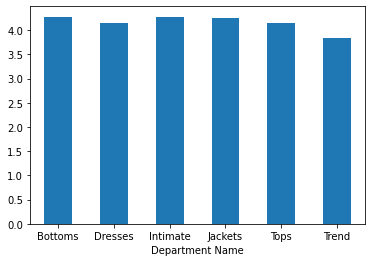

In [124]:
df_Department.plot.bar(x='Department Name', y='Sentiment', rot=0)

In [92]:
#Sample checks

In [93]:
review_sample1 = df['Review Text'][5]

In [94]:
review_sample1

'I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.'

In [95]:
TextBlob(review_sample1).sentiment

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [96]:
review_sample2 = df['Review Text'][40]

In [97]:
review_sample2

'Pretty and unique. great with jeans or i have worn it to work with slacks and heels. the colors, print, and embroidery are lovely. reasonably priced!'

In [98]:
TextBlob(review_sample2).sentiment

Sentiment(polarity=0.43499999999999994, subjectivity=0.82)

In [99]:
review_sample3 = df['Review Text'][100]

In [100]:
review_sample3

"At first i wasn't sure about it. the neckline is much lower and wavy than i thought. but after wearing it, it really is comfortable. it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso."

In [101]:
TextBlob(review_sample3).sentiment

Sentiment(polarity=0.3375, subjectivity=0.5555555555555556)

In [102]:
#for the any selected customer review, use textblob to break out the text into sentences

In [103]:
Text1 = TextBlob(df['Review Text'][5])

In [104]:
Text1.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [105]:
Text2 = TextBlob(df['Review Text'][40])

In [106]:
Text2.sentences

[Sentence("Pretty and unique."),
 Sentence("great with jeans or i have worn it to work with slacks and heels."),
 Sentence("the colors, print, and embroidery are lovely."),
 Sentence("reasonably priced!")]

In [107]:
Text3 = TextBlob(df['Review Text'][100])

In [108]:
Text3.sentences

[Sentence("At first i wasn't sure about it."),
 Sentence("the neckline is much lower and wavy than i thought."),
 Sentence("but after wearing it, it really is comfortable."),
 Sentence("it stretches a lot, so i wear a cami underneath so when i lean forward i'm not showing the world my torso.")]

In [109]:
#using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0



In [110]:
df_Division_min= df.groupby("Division Name")["Sentiment"].min()

In [111]:
df_Division_min

Division Name
General          -0.975000
General Petite   -0.700000
Initmates        -0.392333
Name: Sentiment, dtype: float64

In [112]:
df_Department_min = df.groupby("Department Name")["Sentiment"].min()

In [113]:
df_Department_min

Department Name
Bottoms    -0.533333
Dresses    -0.916667
Intimate   -0.575000
Jackets    -0.750000
Tops       -0.975000
Trend      -0.270833
Name: Sentiment, dtype: float64

In [114]:
#visualise this summary as a simple sorted bar chart

<AxesSubplot:xlabel='Division Name'>

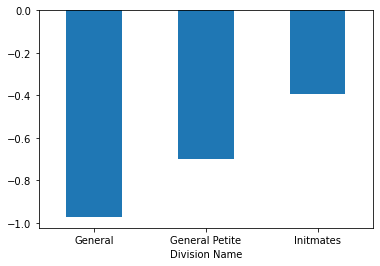

In [115]:
df_Division_min.plot.bar(x='Division Name', y='Sentiment', rot=0)

<AxesSubplot:xlabel='Department Name'>

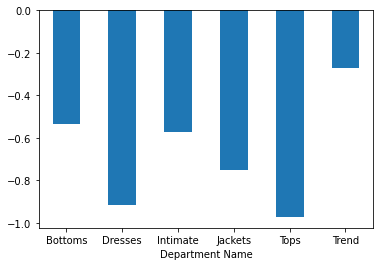

In [116]:
df_Department_min.plot.bar(x='Department Name', y='Sentiment', rot=0)